# <span style = "color: green"> Employee attrition Classification </span>

***

The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If an employee you have invested so much time and money leaves for "greener pastures", then this would mean that you would have to spend even more time and money to hire somebody else. In the spirit of Kaggle, let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this synthetically generated IBM dataset.

### Let's Dive into it

#### Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Read 'HR-Employee-Attrition.csv' dataset and store it inside a variable

In [8]:
df = pd.read_csv('HR-Employee-Attrition.csv')

### Check head

In [10]:
pd.set_option("display.max_columns", None)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Check last 5 rows

In [13]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


### Check shape

In [15]:
df.shape

(1470, 35)

### View info about the dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### View basic statistical information about the dataset

In [19]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Check for null values

In [21]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### View unique values in all categorical columns

In [23]:
for column in df.select_dtypes('O').columns:
    print(f"Unique values in {column}",df[column].unique())

Unique values in Attrition ['Yes' 'No']
Unique values in BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in Department ['Sales' 'Research & Development' 'Human Resources']
Unique values in EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in Gender ['Female' 'Male']
Unique values in JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in MaritalStatus ['Single' 'Married' 'Divorced']
Unique values in Over18 ['Y']
Unique values in OverTime ['Yes' 'No']


### Check the number of unique values in all columns

In [25]:
for column in df.columns:
    print(f"Number of unique values in {column}",df[column].nunique())

Number of unique values in Age 43
Number of unique values in Attrition 2
Number of unique values in BusinessTravel 3
Number of unique values in DailyRate 886
Number of unique values in Department 3
Number of unique values in DistanceFromHome 29
Number of unique values in Education 5
Number of unique values in EducationField 6
Number of unique values in EmployeeCount 1
Number of unique values in EmployeeNumber 1470
Number of unique values in EnvironmentSatisfaction 4
Number of unique values in Gender 2
Number of unique values in HourlyRate 71
Number of unique values in JobInvolvement 4
Number of unique values in JobLevel 5
Number of unique values in JobRole 9
Number of unique values in JobSatisfaction 4
Number of unique values in MaritalStatus 3
Number of unique values in MonthlyIncome 1349
Number of unique values in MonthlyRate 1427
Number of unique values in NumCompaniesWorked 10
Number of unique values in Over18 1
Number of unique values in OverTime 2
Number of unique values in Perce

### Print out the names of the columns having only one unique values 

In [27]:
list1=[]
for column in df.columns:
    if df[column].nunique()==1:
        list1.append(column)
list1

['EmployeeCount', 'Over18', 'StandardHours']

### Drop these columns as they won't be useful in our predicition

In [29]:
df.drop(list1,axis=1,inplace=True)

### Drop EmployeeNumber column aswell

In [31]:
df.drop('EmployeeNumber',axis=1,inplace=True)

### Create following groupby valuecounts

In [33]:
df.groupby(['Department','EducationField','Gender']).size()

Department              EducationField    Gender
Human Resources         Human Resources   Female      8
                                          Male       19
                        Life Sciences     Female      9
                                          Male        7
                        Medical           Female      2
                                          Male       11
                        Other             Male        3
                        Technical Degree  Female      1
                                          Male        3
Research & Development  Life Sciences     Female    166
                                          Male      274
                        Medical           Female    152
                                          Male      211
                        Other             Female     25
                                          Male       39
                        Technical Degree  Female     36
                                          Male       58

# <span style = "color: orange"> Data Visualization </span>

### Plot the following

<Axes: xlabel='Attrition', ylabel='count'>

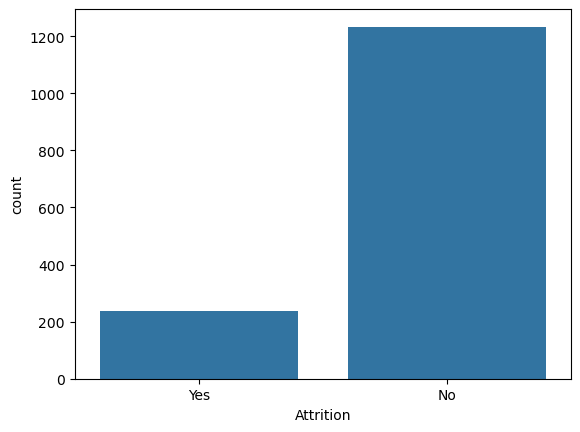

In [36]:
sns.countplot(x=df['Attrition'],orient='x')

### Data Preprocessing

#### Convert Attrition from ('Yes', 'No') to (1,0) 

In [39]:
df['Attrition'] = df['Attrition'].eq('Yes').astype(int)

### Convert the rest of the categorical values into numeric using dummy variables and store the results in a new dataframe called 'newdf'

In [41]:
newdf = pd.get_dummies(df,dtype=int)

In [42]:
newdf.head(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0


#### Check the shape of our new dataset

In [44]:
newdf.shape

(1470, 52)

#### Print unique values in our new dataframe

In [46]:
for i in df.columns:
    print('Unique values in {}:'.format(i),df[i].unique())
    print('#'*90,end='\n\n')

Unique values in Age: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
##########################################################################################

Unique values in Attrition: [1 0]
##########################################################################################

Unique values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
##########################################################################################

Unique values in DailyRate: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 115

#### Split the columns into input and target variables (X and y)

In [48]:
y = newdf['Attrition']
X = newdf.drop('Attrition',axis=1)

#### Carry out Feature scaling using StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss = StandardScaler()

### Split the dataset into training and testing set

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=42,stratify=y)

In [55]:
y_train.value_counts()

Attrition
0    863
1    166
Name: count, dtype: int64

## Machine Learning Models

### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       1.00      0.01      0.03        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



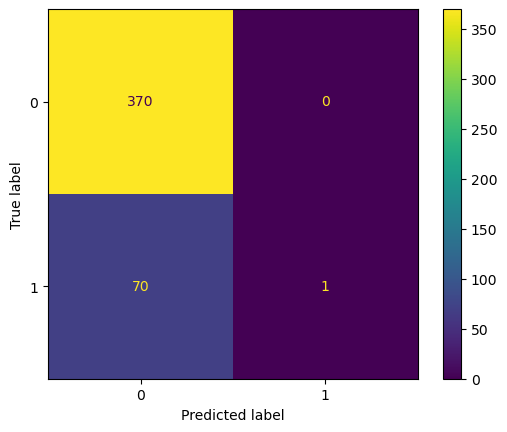

In [59]:
model_score = {}
def train_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test,y_pred))
    metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    cv_score = np.mean(cross_val_score(model,X_train,y_train))
    model_score[str(model)[:-2]] = cv_score
train_model(LogisticRegression())

<span style = "color:orange"> Visualize confusion matrix </span>

### Random Forest Classifier
** Choose the best estimator and parameters :GridSearchCV**

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       370
           1       0.55      0.17      0.26        71

    accuracy                           0.84       441
   macro avg       0.70      0.57      0.59       441
weighted avg       0.81      0.84      0.81       441



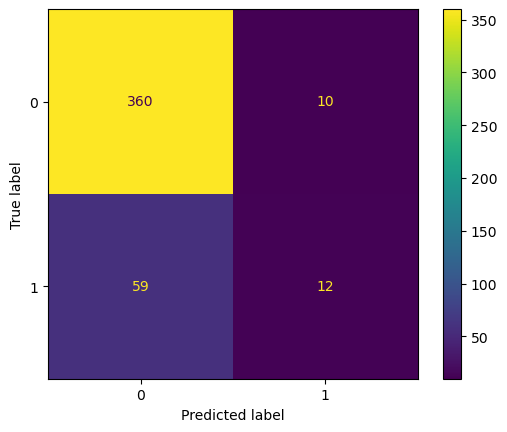

In [63]:
train_model(RandomForestClassifier())

<span style = "color:blue"> Create Random forest model with the best parameters </span>

In [65]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
gds = GridSearchCV(RandomForestClassifier(verbose=True),param_grid=param_grid,n_jobs=4,verbose=True)
gds.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
gds.best_params_

In [ ]:
gds.best_score_

In [ ]:
# except for estimator all remaning are defualt
train_model(RandomForestClassifier(n_estimators=200,class_weight={1:5,0:1}))

<span style = "color:orange"> Visualize confusion matrix </span>

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
train_model(SVC())

<span style = "color:orange"> Visualize confusion matrix </span>

### AdaBoost: Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


<span style = "color:orange"> Visualize confusion matrix </span>

In [ ]:
train_model(AdaBoostClassifier())

### View score of different models in one dataframe

In [ ]:
model_score

In [ ]:
pd.DataFrame(model_score,index=[0]).T.rename(columns={0:'score'})

## Use PCA to reduce dimensionality of the data

#### Import PCA and fit our X_train

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(X_train)

#### Apply the mapping (transform) to both the training set and the test set.

In [ ]:
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

#### Import machine learning model of our choice, we are going with RandomForest for this problem

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### Create RandomForest model with the best parameter we got earlier and train it

In [ ]:
def train_model(model):
    model.fit(train_X,y_train)
    print('Model Score:',model.score(train_X,y_train))
    y_pred = model.predict(test_X)
    print('Classification Report')
    print(metrics.classification_report(y_test,y_pred))
    metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    cv_score = np.mean(cross_val_score(model,X_train,y_train))
    print("CV Score :",cv_score)

#### Check the score of our model

In [ ]:
train_model(RandomForestClassifier(n_estimators=300))

#### Make predictions with X_test and check the accuracy score

In [ ]:
# All done in the Fuction above

### Print Confusion matrix and Classification report

In [ ]:
# All done in the Fuction above

# <span style = "color:green"> Good Job! You have Successfully completed one Capstone Project </span>

***